<a href="https://colab.research.google.com/github/sitthatkaja/AIprototype65/blob/main/tensorflow_(Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **tensorflow sequential model**

 แบ่งเป็น 3 แบบ สำหรับการเรียนได้แก่
- Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง)) // เดินทางเป็นเส้นตรง
- Functional (ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทางให้มีความซับซ้อนได้) // กระโดดไปทางลัดได้
- Subclassing (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ) // สร้าง class ขึ้นมาเองเลย

***

## **1.Sequential**



### **1.1 การสร้าง Sequential แบบที่ 1**

In [1]:
#Import

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#Define
#Define Sequential model with 3 layers
# .Dense คือ เชื่อมทุกโหนด

model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="output")
    ]
)

In [5]:
#คือการเช็ค parameter หมายถึงการเช็คการเชื่อมของแต่ละโหนด !อย่าลืมตัว bias ด้วย

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)

In [11]:
#Predict
# Call model on a test input

x = tf.ones((5, 4)) #inputเป็นตาราง 5x4 แบบเลข 1

In [19]:
y = model(x) #output

In [20]:
x #แสดงตาราง input

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [21]:
y #แสดงตาราง output

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.28238124,  0.2503539 , -0.23710111, -0.6937422 ],
       [ 0.28238124,  0.2503539 , -0.23710111, -0.6937422 ],
       [ 0.28238124,  0.2503539 , -0.23710111, -0.6937422 ],
       [ 0.28238124,  0.2503539 , -0.23710111, -0.6937422 ],
       [ 0.28238124,  0.2503539 , -0.23710111, -0.6937422 ]],
      dtype=float32)>

***

### **1.2 สร้าง sequential แบบที่สอง**

In [22]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [23]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


#### ปรับเปลี่ยน Network

In [28]:
model2.pop() #ตัด layer output

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [30]:
model2.add(layers.Dense(6)) #แอดเพิ่ม

In [31]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [32]:
x = tf.ones((5, 4))

In [33]:
y = model2(x)

In [35]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [34]:
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)>

***

### **1.3 ลองเทรน Sequential model ที่สร้างขึ้นเอง**

In [36]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
     

#### load data

In [37]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


#### แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [38]:
# Normalize pixel values to be between 0 and 1

train_images, test_images = train_images / 255.0, test_images / 255.0 #ทำการหารด้วย 255 !เพราะว่า code รูปภาพจะอยู่ที่ 0-255

#### plot รูปตัวอย่าง

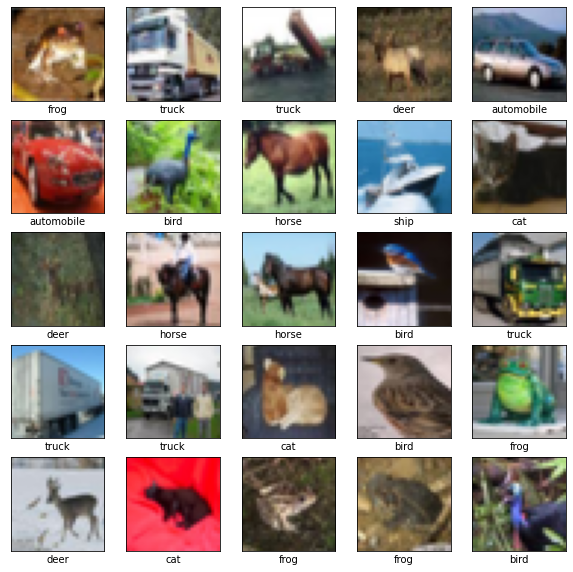

In [39]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [42]:
#Define 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #input sharp is a red, Green and blue !เชื่อมด้วย Conv2D | 3x3 จำนวน 32 layer
model.add(layers.MaxPooling2D((2, 2))) #Maxpooling หาตัวที่ดีที่สุดแล้วดึงออกมา
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

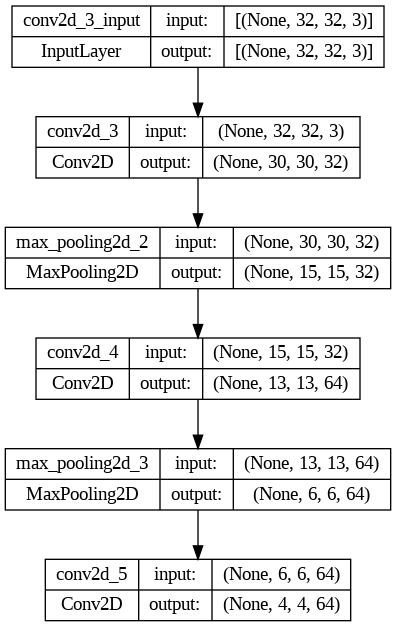

In [44]:
keras.utils.plot_model(model,show_shapes=True) #plot ออกมาให้เห็นภาพรวม

#### ต่อด้วย flatten และ dense เพื่อทำนาย

- flatten คือการยืดเป็นโหนดใหญ่ 1 เส้นก่อนเชื่อมด้วย dense

In [45]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

#### Define training parameters

In [51]:
#loss

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
#Train

history = model.fit(train_images, train_labels, epochs=2, # epochs หมายถึงจำนวนรอบ
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0032 - accuracy: 0.6463 - val_loss: 1.0310 - val_accuracy: 0.6421
Epoch 2/2
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9106 - accuracy: 0.6816 - val_loss: 0.9523 - val_accuracy: 0.6664


#### Test and plot

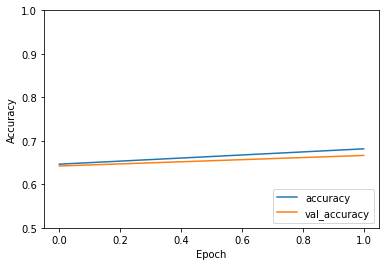

In [53]:
#Test การ plot

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 4s - loss: 0.9523 - accuracy: 0.6664 - 4s/epoch - 14ms/step


In [55]:
print(test_acc)

0.6664000153541565


***

## **2.Functional**

In [56]:
#import

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [57]:
#Define

input_images = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า | จะให้มันรับอะไรก็ได้ขึ้นอยู่กับที่เราต้องการ
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [58]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [59]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

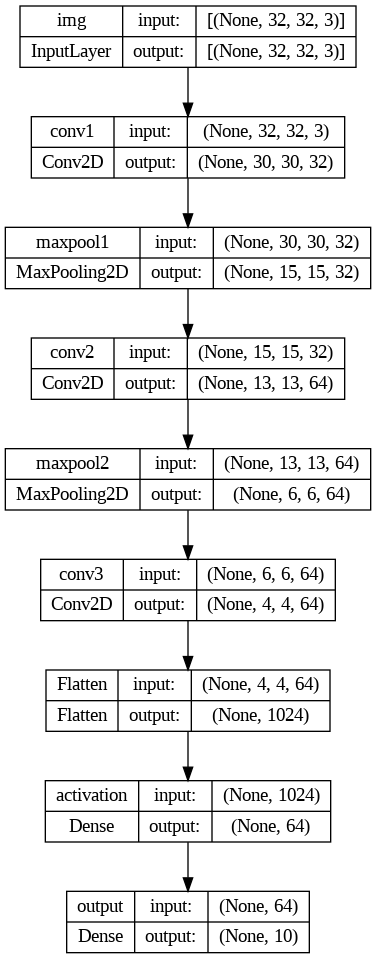

In [60]:
keras.utils.plot_model(my_model, show_shapes=True)

In [61]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
history = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5341 - accuracy: 0.4420 - val_loss: 1.2637 - val_accuracy: 0.5526
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1583 - accuracy: 0.5869 - val_loss: 1.0597 - val_accuracy: 0.6253
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0125 - accuracy: 0.6433 - val_loss: 1.0145 - val_accuracy: 0.6451
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9225 - accuracy: 0.6766 - val_loss: 0.9284 - val_accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8494 - accuracy: 0.7035 - val_loss: 0.9269 - val_accuracy: 0.6754
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7970 - accuracy: 0.7215 - val_loss: 0.9083 - val_accuracy: 0.6889
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7473 - accuracy: 0.7386 - val_loss: 0.8352 -

313/313 - 4s - loss: 0.8846 - accuracy: 0.7093 - 4s/epoch - 12ms/step


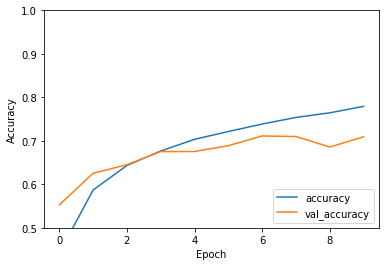

In [63]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [64]:
print(test_acc)

0.7092999815940857


## **3.Tensorflow Data Pipeline**

#### flow from directory

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [67]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 198, 198, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_7 (Conv2D)              (None, 196, 196, 64  18496       ['conv2d_6[0][0]']               
                                )                                                   

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=4,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [69]:
from tensorflow.keras import optimizers

In [70]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [71]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7,
      epochs=50,
      verbose=1)

<ipython-input-71-bd3860035948>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


Epoch 1/50
7/7 [==============================] - 15s 2s/step - loss: 7.1653 - accuracy: 0.5769
Epoch 2/50
7/7 [==============================] - 7s 976ms/step - loss: 3.6422 - accuracy: 0.6154
Epoch 3/50
7/7 [==============================] - 7s 1s/step - loss: 1.3095 - accuracy: 0.4615
Epoch 4/50
7/7 [==============================] - 7s 989ms/step - loss: 2.0090 - accuracy: 0.4231
Epoch 5/50
7/7 [==============================] - 7s 964ms/step - loss: 1.4017 - accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 7s 967ms/step - loss: 0.8315 - accuracy: 0.5385
Epoch 7/50
7/7 [==============================] - 7s 967ms/step - loss: 0.7424 - accuracy: 0.4231
Epoch 8/50
7/7 [==============================] - 8s 1s/step - loss: 0.7919 - accuracy: 0.6154
Epoch 9/50
7/7 [==============================] - 7s 966ms/step - loss: 0.7303 - accuracy: 0.6154
Epoch 10/50
7/7 [==============================] - 7s 976ms/step - loss: 0.6835 - accuracy: 0.5000
Epoch 11/50
7/7 [==========